In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
   

In [41]:
dataset = pd.read_csv('globalterrorismdb_0718dist.csv',encoding = 'latin1') #Pandas Dataframe to read the given dataset and store it .
dataset.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [42]:
dataset.columns.values
#displays all the name of the columns

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [43]:
dataset.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)
#renaming the columns in a more understandable format

In [44]:
dataset = dataset[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]
#filtering the dataset

In [45]:
dataset.shape#rows and columns

(181691, 18)

In [46]:
dataset.isnull().sum()#to display the number of NULL values in each Coloumns

Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
kill           10313
Wound          16311
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

In [47]:
dataset['kill'] = dataset['kill'].fillna(0)
dataset['Wound'] = dataset['Wound'].fillna(0)
#this code is used in order to fill the NULL values as zeroes

In [48]:
dataset['Casualities'] = dataset['kill'] + dataset['Wound']#Adding new Column to show total casualities

In [49]:
dataset.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive,Casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0.0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0.0


In [50]:
dataset.info()# The Datatypes and Non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   Attacktype   181691 non-null  object 
 10  kill         181691 non-null  float64
 11  Wound        181691 non-null  float64
 12  target1      181055 non-null  object 
 13  summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Targettype   181691 non-null  object 
 16  Weapon       181691 non-null  object 
 17  motive       50561 non-null   object 
 18  Casualities  181691 non-

In [51]:
dataset.describe()

,Year,Month,day,latitude,longitude,kill,Wound,Casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


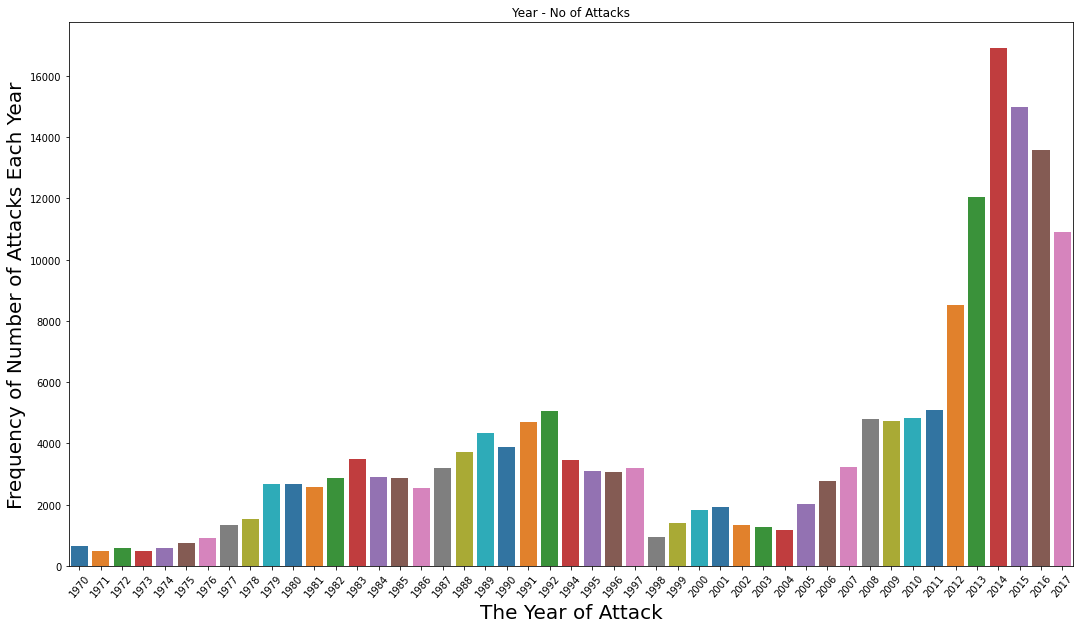

In [52]:
year = dataset['Year'].unique()#To find the unique values in the columns
year_data = dataset['Year'].value_counts(dropna = False).sort_index()#Count the number of unique values in the columna and Sort according to the labels
plt.figure(figsize = (18,10))
sns.barplot(x = year,y = year_data,palette="tab10")#display the bargraph(using the seaborn library)
plt.xticks(rotation = 50)#So that the years dont overwrite on each other
plt.xlabel('The Year of Attack',fontsize = 20)
plt.ylabel('Frequency of Number of Attacks Each Year',fontsize = 20)
plt.title('Year - No of Attacks') 
plt.show()

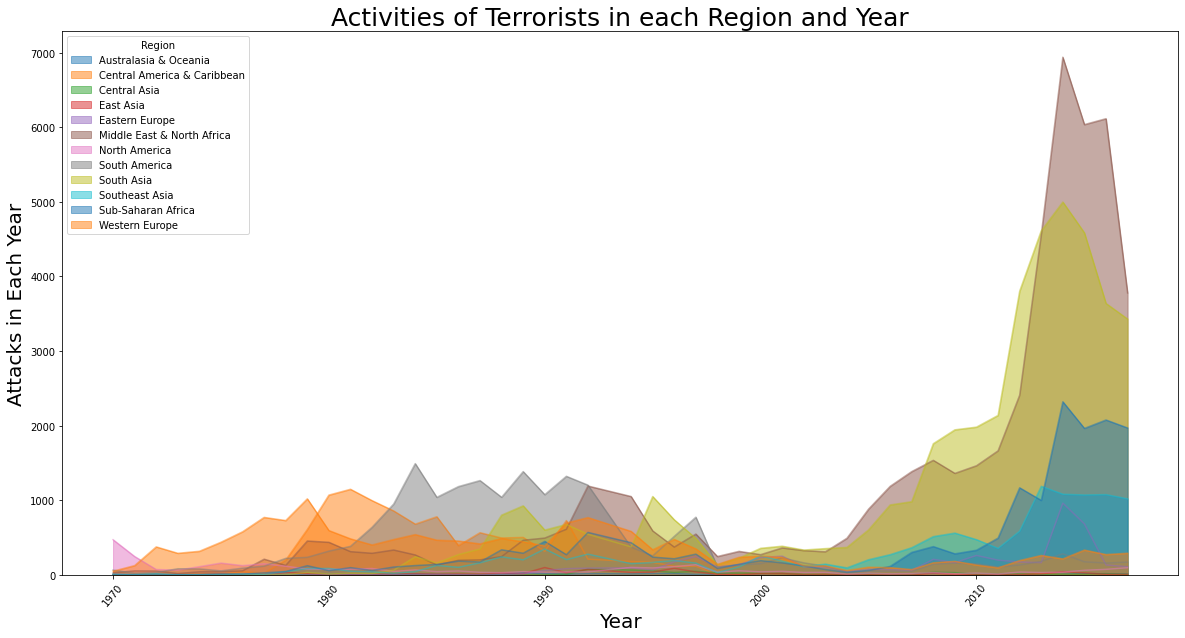

In [54]:
pd.crosstab(dataset.Year,dataset.Region).plot(kind='area',stacked=False,figsize = (20,10))#to do the crosstabulations and the frequency of attacks and shows a area graph
plt.title('Activities of Terrorists in each Region and Year', fontsize = 25)
plt.ylabel('Attacks in Each Year',fontsize = 20)
plt.xlabel('Year',fontsize = 20)
plt.xticks(rotation = 50)
plt.show()

In [55]:
attack = dataset.Country.value_counts()[:10]
attack#In order to show number of Attacks in each country

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [56]:
#to find the number of Attacks by each terrorists group
dataset.Group.value_counts()[:10]

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Group, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


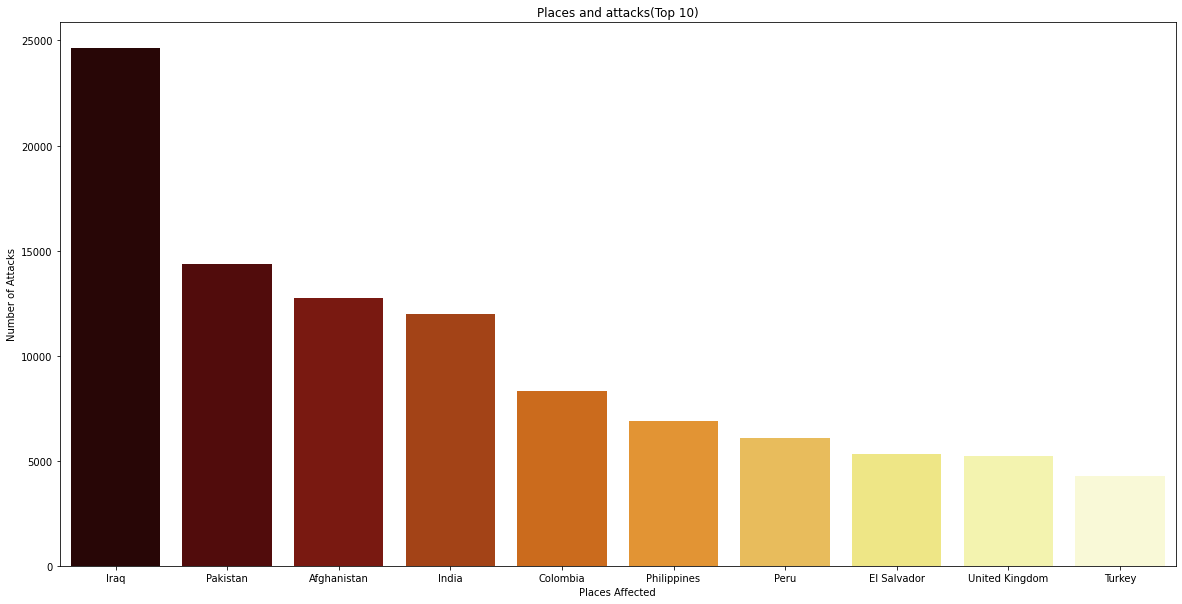

In [57]:
plt.subplots(figsize=(20,10))
sns.barplot(dataset['Country'].value_counts()[:10].index, dataset['Country'].value_counts()[:10].values,palette='afmhot')
#Plotting between each country and its attacks(Top countries attacked)
plt.title('Places and attacks(Top 10)')
plt.xlabel('Places Affected')
plt.ylabel('Number of Attacks')
plt.show()

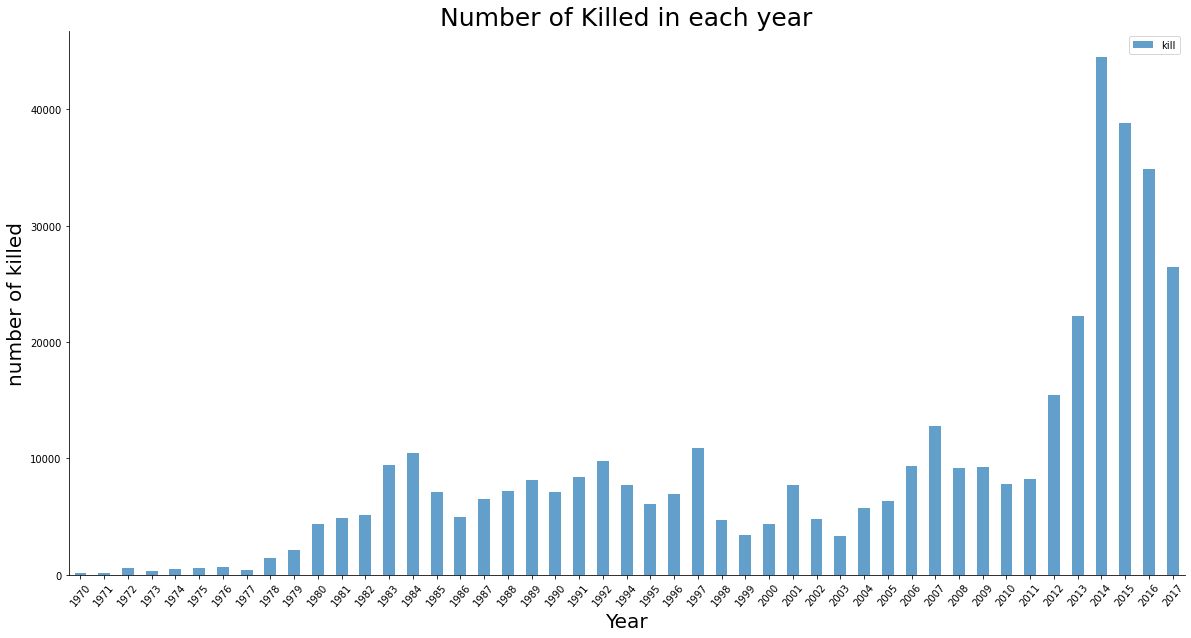

In [58]:
new_data = dataset[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
new_data.plot(kind = 'bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title('Number of Killed in each year',fontsize = 25)
plt.xlabel('Year',fontsize = 20)
plt.ylabel('number of killed',fontsize = 20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

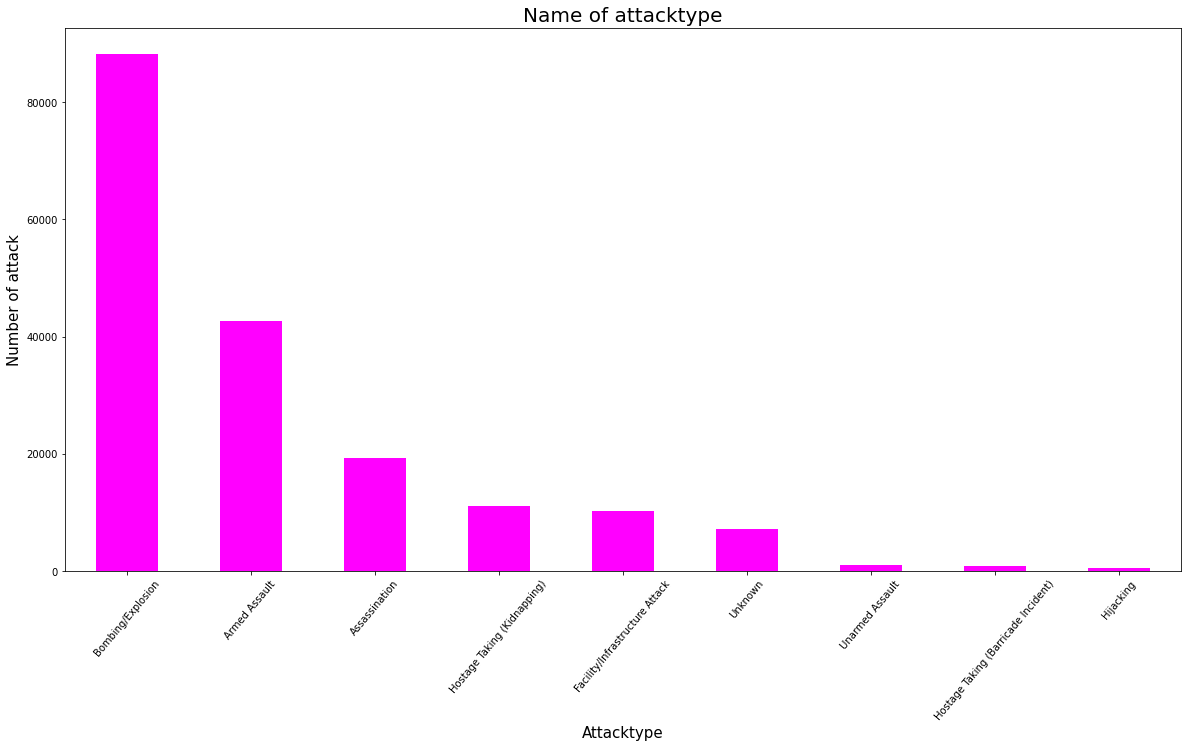

In [59]:
#Calculate each number of attack types and plot a graph
dataset['Attacktype'].value_counts().plot(kind='bar',figsize=(20,10),color='magenta')
plt.xticks(rotation = 50)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Name of attacktype",fontsize=20)
plt.show()


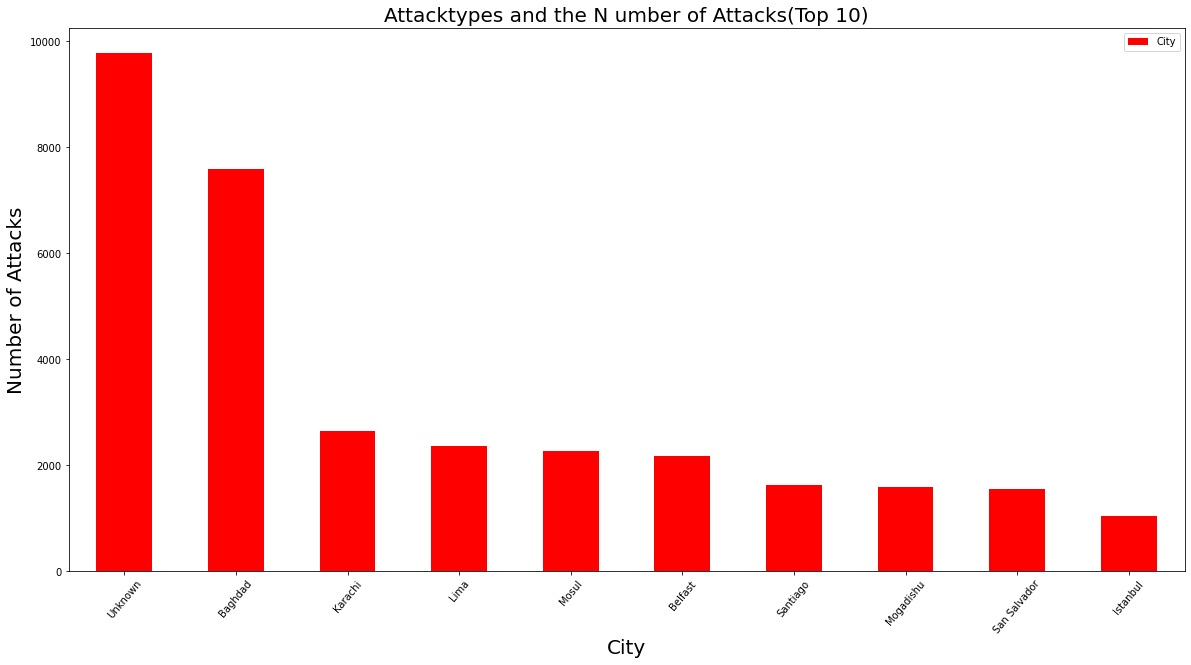

In [60]:
#fetching the number of times there was an attack at City and chaneg into a dataframe
dataset['City'].value_counts().to_frame().sort_values('City',axis = 0,ascending = False).head(10).plot(kind = 'bar',figsize = (20,10),color = 'red')
plt.xticks(rotation = 50)
plt.xlabel('City',fontsize = 20)
plt.ylabel('Number of Attacks',fontsize = 20)
plt.title('Attacktypes and the N umber of Attacks(Top 10)',fontsize = 20)
plt.show()

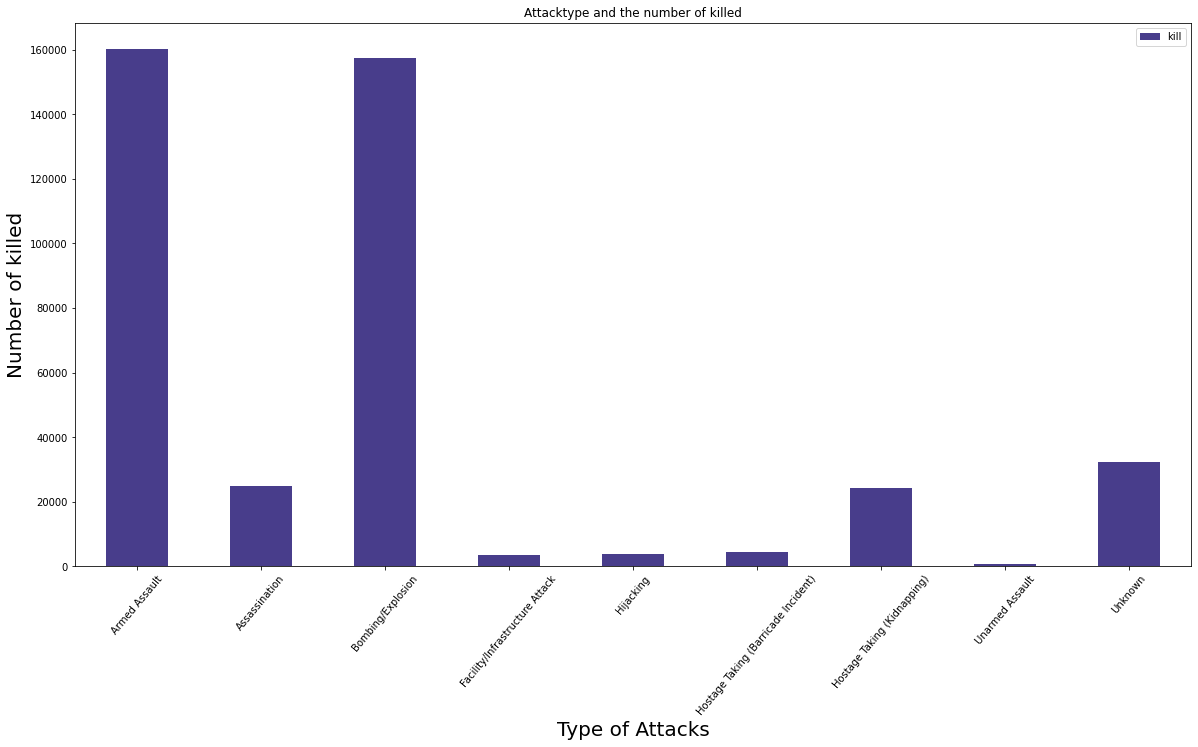

In [61]:
dataset[['Attacktype','kill']].groupby(["Attacktype"],axis = 0).sum().plot(kind = 'bar',figsize = (20,10),color = ['darkslateblue'])
plt.xticks(rotation = 50)
plt.xlabel('Type of Attacks',fontsize = 20)
plt.ylabel('Number of killed',fontsize = 20)
plt.title('Attacktype and the number of killed')
plt.show()

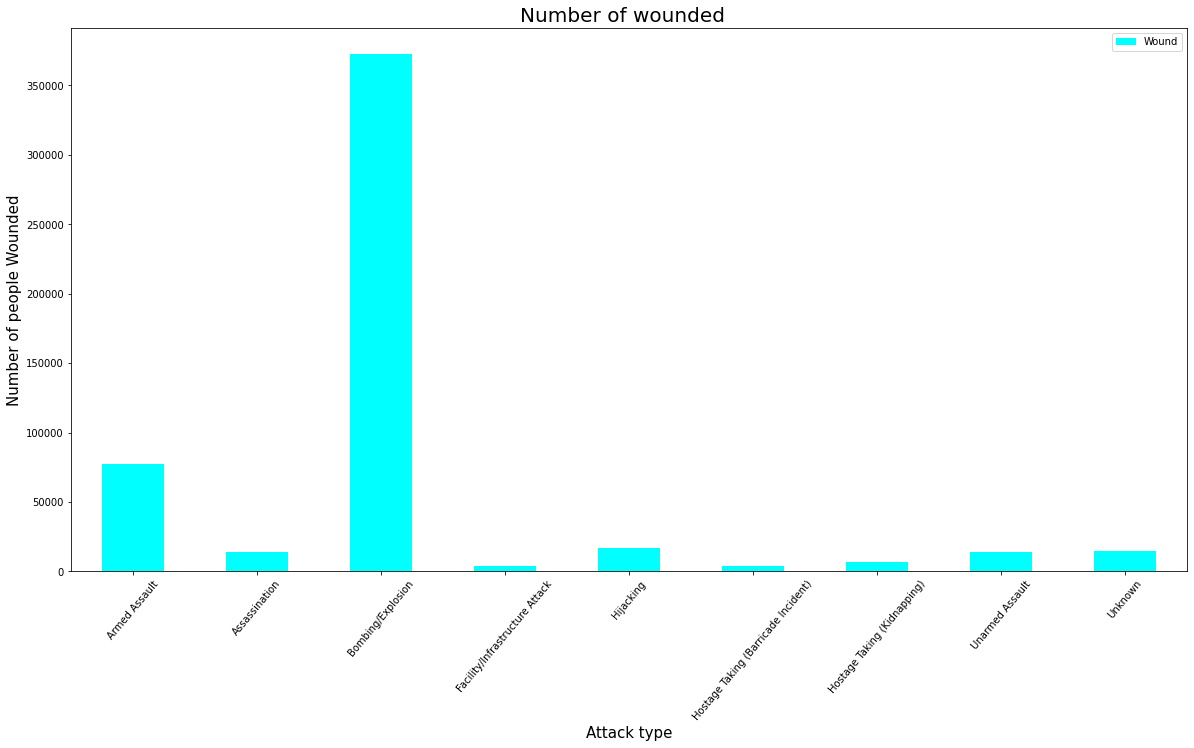

In [63]:
#Each Attacktypes and the wounds
dataset[['Attacktype','Wound']].groupby(['Attacktype'],axis = 0).sum().plot(kind = 'bar',figsize = (20,10),color = ['cyan'])
plt.xticks(rotation=50)
plt.title("Number of wounded  ",fontsize=20)
plt.ylabel('Number of people Wounded',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


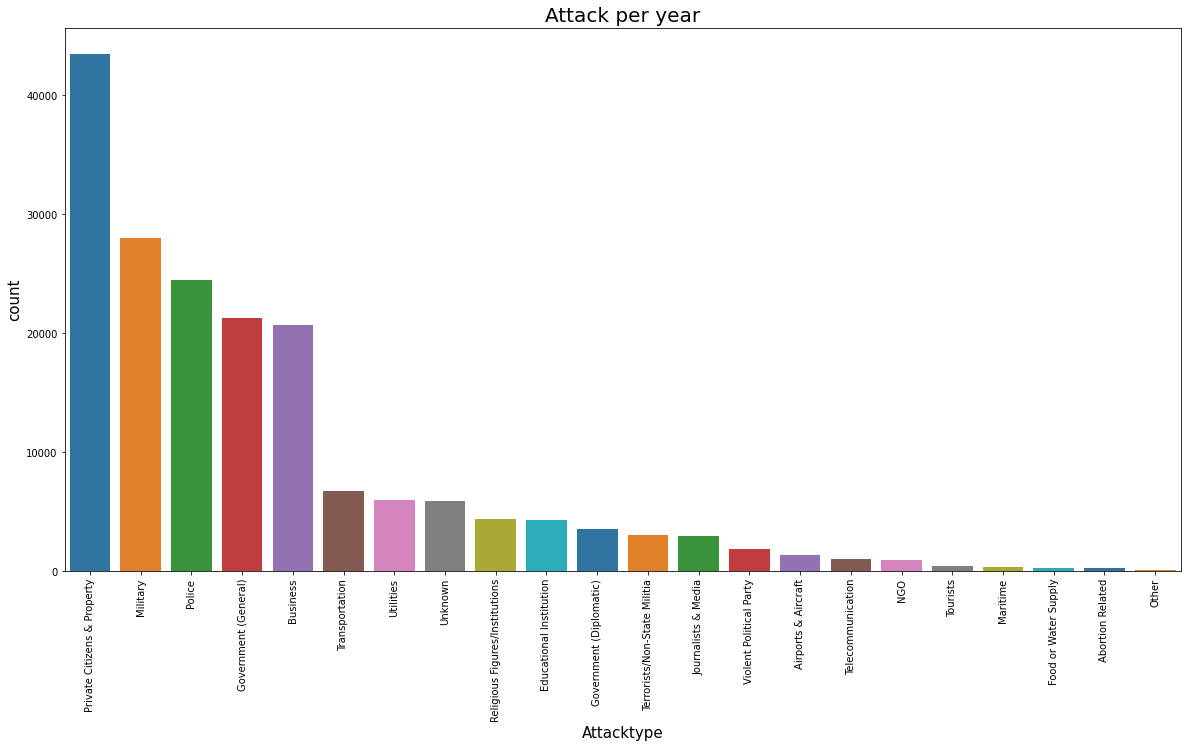

In [64]:
plt.subplots(figsize = (20,10))
sns.countplot(dataset['Targettype'],order = dataset['Targettype'].value_counts().index,palette = 'tab10' )
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Attack per year",fontsize=20)
plt.show()

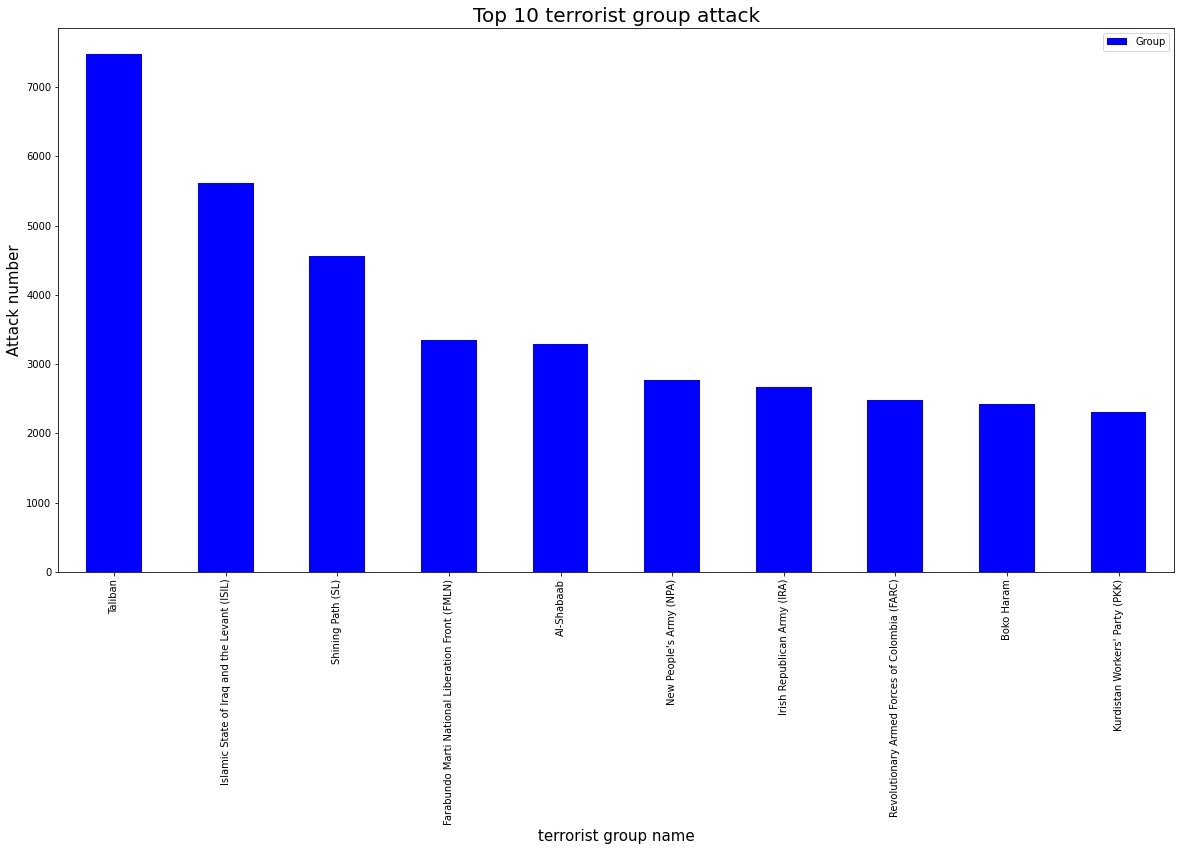

In [65]:

dataset['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='blue',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

In [66]:
#to show the terrorist group and the country and number of kills
df=dataset[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Group,Country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


In [67]:
kill = dataset.loc[:,'kill']
print('Total number of people killed by terror attack:', int(sum(kill.dropna())))

Total number of people killed by terror attack: 411868


In [68]:
Attacktype_Kills = dataset.pivot_table(columns = 'Attacktype',values = 'kill',aggfunc = 'sum')
Attacktype_Kills

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [69]:
No_of_kills_country = dataset.pivot_table(columns = 'Country',values = 'kill',aggfunc = 'sum')
No_of_kills_country

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia-Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cuba,...,Soviet Union,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,258.0,1.0,44.0,1244.0,76.0,14.0,79.0,3.0,0.0,9.0,42.0,79.0,11.0,203.0,0.0,28.0,134.0,4205.0,543.0,2347.0,365.0,1990.0,1119.0,228.0,1008.0,14698.0,1.0,17.0,248.0,8.0,...,96.0,1288.0,15530.0,0.0,2.0,3883.0,29.0,6.0,22.0,74.0,15229.0,60.0,307.0,73.0,2742.0,76.0,6.0,351.0,6888.0,3.0,3065.0,2261.0,123.0,3410.0,3771.0,6.0,68.0,0.0,0.0,227.0,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


In [72]:
Regionattacks  = dataset.Region.value_counts()[:1]
Regionattacks

Middle East & North Africa    50474
Name: Region, dtype: int64

In [73]:
MonthAttacks = dataset.Month.value_counts()[:1]
MonthAttacks

5    16875
Name: Month, dtype: int64

In [74]:
Attacks = dataset.Attacktype.value_counts()[:1]
Attacks

Bombing/Explosion    88255
Name: Attacktype, dtype: int64

In [75]:
Year = dataset.Year.value_counts()[:1]
Year

2014    16903
Name: Year, dtype: int64

<strong>The Final Conclusions</strong>
<ol>
  <ul>
    <li>Region with most number of attacks:<strong>Middle East & North Africa</strong></li>
    <li>City with most number of attacks:<strong>Baghbad</strong></li>
    <li>Country with most number of attacks:<strong>Iraq</strong></li>
    <li>Year with most number of attacks:<strong>2014</strong></li>
    <li>Month with most number of Attacks:<strong>5</strong></li>
    <li>Group with most number of attacks:<strong>Taliban</strong></li>
    <li>Most number of Attacks Types:<strong>Bombing/Explosion</strong></li>
  </ul>
</ol>